In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  4 20:20:27 2021

@author: Gino Vigliecca
"""
import hopfield as hf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [7]:
print_arrays = False
sync = False

n = 500
p_start = 10
p_stop = 100 + p_start
p_step = 10
t_max = 100

In [8]:
parameters = [n, p_start, p_stop, p_step]
parameters_list = np.array([[2**k*i for i in parameters] for k in range(3)])
neurons_list = parameters_list[:,0]
alpha_vals = np.array([p/n for p in range(p_start, p_stop, p_step)])

In [9]:
data = pd.DataFrame()
data['alpha'] = alpha_vals
start_time = time.time()

for k in range(len(parameters_list)):
    n, p_start, p_stop, p_step = parameters_list[k]
    m_mean_vals = []
    for p in range(p_start, p_stop, p_step):
        print('n = {},    p = {}'.format(n, p))      
        print('Generando red...')
        net = hf.HopfieldNetwork(n, p)
        print('Generando patrones aleatorios...')
        net.xi = hf.generate_random_array(n, p)
        print('Inicializando los pesos...')
        net.w = hf.weights(net.xi)
        m_vals = []
        for mu in range(net.p):
            print()
            pattern = np.ones(net.n, dtype=int)
            pattern[:] = net.xi[:, mu]
            print('Colocando la red en la memoria #{}/{}...'
                  .format(mu+1, net.p))
            net.set_conf(pattern)
            print('Evolucionando...')
            conv, t_conv = net.evolve(print_arrays=print_arrays, t_max=t_max,\
                                      sync=sync)
            if conv:
                if t_conv==1:
                        print('La red ha alcanzado el estado estacionario en \
1 paso.')
                else:
                    print('La red ha alcanzado el estado estacionario en \
{} pasos.'.format(t_conv))
            else:
                print('La red no ha convergido en {} pasos'.format(t_max))
            is_a_memory, mu_mem = net.is_a_memory()
            if is_a_memory == 'mem':
                print('La red ha convergido a la memoria {}.'
                      .format(mu_mem + 1))
            elif is_a_memory == 'neg':
                print('La red ha convergido al negativo de la memoria {}.'
                      .format(mu_mem + 1))
            else:
                print('La red no ha convergido a ninguna memoria.')
            m = hf.superposition(net.s, pattern)
            print('m = {}'.format(m))
            m_vals.append(m)
        m_mean = np.array(m_vals).mean()
        m_err = np.array(m_vals).std()/np.sqrt(net.p)
        print()
        print('m_mean = {}'.format(m_mean))
        print()
        m_mean_vals.append(m_mean)
    data[str(neurons_list[k])] = m_mean_vals

data.to_csv('Data/data.csv', float_format='%.3f', index=False)
print('Execution time: {}s'.format(time.time() - start_time))

n = 500,    p = 10
Generando red...
Generando patrones aleatorios...
Inicializando los pesos...

Colocando la red en la memoria #1/10...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 1.
m = 1.0

Colocando la red en la memoria #2/10...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 2.
m = 1.0

Colocando la red en la memoria #3/10...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 3.
m = 1.0

Colocando la red en la memoria #4/10...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 4.
m = 1.0

Colocando la red en la memoria #5/10...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 5.
m = 1.0

Colocando la red en la memoria #6/10...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
L


Colocando la red en la memoria #1/40...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 1.
m = 1.0

Colocando la red en la memoria #2/40...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 2.
m = 1.0

Colocando la red en la memoria #3/40...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.996

Colocando la red en la memoria #4/40...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 4.
m = 1.0

Colocando la red en la memoria #5/40...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 5.
m = 1.0

Colocando la red en la memoria #6/40...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 6.
m = 1.0

Colocando la red en la memoria #7/40...
Evol

La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 18.
m = 1.0

Colocando la red en la memoria #19/50...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 19.
m = 1.0

Colocando la red en la memoria #20/50...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 20.
m = 1.0

Colocando la red en la memoria #21/50...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 21.
m = 1.0

Colocando la red en la memoria #22/50...
Evolucionando...
La red ha alcanzado el estado estacionario en 2 pasos.
La red no ha convergido a ninguna memoria.
m = 0.98

Colocando la red en la memoria #23/50...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 23.
m = 1.0

Colocando la red en la memoria #24/50...
Evolucionando...
La red ha alcanzado el estado esta

La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 1.
m = 1.0

Colocando la red en la memoria #2/70...
Evolucionando...
La red ha alcanzado el estado estacionario en 16 pasos.
La red no ha convergido a ninguna memoria.
m = 0.688

Colocando la red en la memoria #3/70...
Evolucionando...
La red ha alcanzado el estado estacionario en 2 pasos.
La red no ha convergido a ninguna memoria.
m = 0.992

Colocando la red en la memoria #4/70...
Evolucionando...
La red ha alcanzado el estado estacionario en 3 pasos.
La red no ha convergido a ninguna memoria.
m = 0.976

Colocando la red en la memoria #5/70...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 5.
m = 1.0

Colocando la red en la memoria #6/70...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 6.
m = 1.0

Colocando la red en la memoria #7/70...
Evolucionando...
La red ha alcanzado el esta


Colocando la red en la memoria #1/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 3 pasos.
La red no ha convergido a ninguna memoria.
m = 0.964

Colocando la red en la memoria #2/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 3 pasos.
La red no ha convergido a ninguna memoria.
m = 0.94

Colocando la red en la memoria #3/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 4 pasos.
La red no ha convergido a ninguna memoria.
m = 0.956

Colocando la red en la memoria #4/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 27 pasos.
La red no ha convergido a ninguna memoria.
m = 0.388

Colocando la red en la memoria #5/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 13 pasos.
La red no ha convergido a ninguna memoria.
m = 0.296

Colocando la red en la memoria #6/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 6.
m = 1.0

Colocando 

La red ha alcanzado el estado estacionario en 5 pasos.
La red no ha convergido a ninguna memoria.
m = 0.88

Colocando la red en la memoria #55/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 11 pasos.
La red no ha convergido a ninguna memoria.
m = 0.604

Colocando la red en la memoria #56/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 3 pasos.
La red no ha convergido a ninguna memoria.
m = 0.956

Colocando la red en la memoria #57/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 6 pasos.
La red no ha convergido a ninguna memoria.
m = 0.86

Colocando la red en la memoria #58/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 6 pasos.
La red no ha convergido a ninguna memoria.
m = 0.912

Colocando la red en la memoria #59/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 27 pasos.
La red no ha convergido a ninguna memoria.
m = 0.248

Colocando la red en la memoria #60/80...
Evolucionando..

La red ha alcanzado el estado estacionario en 37 pasos.
La red no ha convergido a ninguna memoria.
m = 0.356

Colocando la red en la memoria #34/90...
Evolucionando...
La red ha alcanzado el estado estacionario en 6 pasos.
La red no ha convergido a ninguna memoria.
m = 0.876

Colocando la red en la memoria #35/90...
Evolucionando...
La red ha alcanzado el estado estacionario en 12 pasos.
La red no ha convergido a ninguna memoria.
m = 0.624

Colocando la red en la memoria #36/90...
Evolucionando...
La red ha alcanzado el estado estacionario en 6 pasos.
La red no ha convergido a ninguna memoria.
m = 0.896

Colocando la red en la memoria #37/90...
Evolucionando...
La red ha alcanzado el estado estacionario en 7 pasos.
La red no ha convergido a ninguna memoria.
m = 0.588

Colocando la red en la memoria #38/90...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.988

Colocando la red en la memoria #39/90...
Evolucionando.

La red ha alcanzado el estado estacionario en 6 pasos.
La red no ha convergido a ninguna memoria.
m = 0.94

Colocando la red en la memoria #90/90...
Evolucionando...
La red ha alcanzado el estado estacionario en 11 pasos.
La red no ha convergido a ninguna memoria.
m = 0.524

m_mean = 0.726311111111111

n = 500,    p = 100
Generando red...
Generando patrones aleatorios...
Inicializando los pesos...

Colocando la red en la memoria #1/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 13 pasos.
La red no ha convergido a ninguna memoria.
m = 0.492

Colocando la red en la memoria #2/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 15 pasos.
La red no ha convergido a ninguna memoria.
m = 0.292

Colocando la red en la memoria #3/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 9 pasos.
La red no ha convergido a ninguna memoria.
m = 0.628

Colocando la red en la memoria #4/100...
Evolucionando...
La red ha alcanzado el estado estacio

La red ha alcanzado el estado estacionario en 13 pasos.
La red no ha convergido a ninguna memoria.
m = 0.536

Colocando la red en la memoria #51/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 13 pasos.
La red no ha convergido a ninguna memoria.
m = 0.368

Colocando la red en la memoria #52/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 25 pasos.
La red no ha convergido a ninguna memoria.
m = 0.236

Colocando la red en la memoria #53/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 10 pasos.
La red no ha convergido a ninguna memoria.
m = 0.712

Colocando la red en la memoria #54/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 16 pasos.
La red no ha convergido a ninguna memoria.
m = 0.392

Colocando la red en la memoria #55/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 25 pasos.
La red no ha convergido a ninguna memoria.
m = 0.336

Colocando la red en la memoria #56/100...
Evo

La red ha alcanzado el estado estacionario en 24 pasos.
La red no ha convergido a ninguna memoria.
m = 0.224

m_mean = 0.4185200000000001

n = 1000,    p = 20
Generando red...
Generando patrones aleatorios...
Inicializando los pesos...

Colocando la red en la memoria #1/20...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 1.
m = 1.0

Colocando la red en la memoria #2/20...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 2.
m = 1.0

Colocando la red en la memoria #3/20...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 3.
m = 1.0

Colocando la red en la memoria #4/20...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 4.
m = 1.0

Colocando la red en la memoria #5/20...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergid


Colocando la red en la memoria #1/60...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 1.
m = 1.0

Colocando la red en la memoria #2/60...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 2.
m = 1.0

Colocando la red en la memoria #3/60...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 3.
m = 1.0

Colocando la red en la memoria #4/60...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 4.
m = 1.0

Colocando la red en la memoria #5/60...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 5.
m = 1.0

Colocando la red en la memoria #6/60...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 6.
m = 1.0

Colocando la red en la memoria #7/60...
Evolucionan


Colocando la red en la memoria #1/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 1.
m = 1.0

Colocando la red en la memoria #2/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 2.
m = 1.0

Colocando la red en la memoria #3/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 3.
m = 1.0

Colocando la red en la memoria #4/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 4.
m = 1.0

Colocando la red en la memoria #5/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.998

Colocando la red en la memoria #6/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 3 pasos.
La red no ha convergido a ninguna memoria.
m = 0.992

Colocando la red en la memoria #7/80

La red ha convergido a la memoria 74.
m = 1.0

Colocando la red en la memoria #75/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 75.
m = 1.0

Colocando la red en la memoria #76/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 76.
m = 1.0

Colocando la red en la memoria #77/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 77.
m = 1.0

Colocando la red en la memoria #78/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 78.
m = 1.0

Colocando la red en la memoria #79/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.998

Colocando la red en la memoria #80/80...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna m

La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.996

Colocando la red en la memoria #61/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.998

Colocando la red en la memoria #62/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.998

Colocando la red en la memoria #63/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.998

Colocando la red en la memoria #64/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.998

Colocando la red en la memoria #65/100...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.998

Colocando la red en la memoria #66/100...
Evolucionando..

La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.988

Colocando la red en la memoria #23/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 23.
m = 1.0

Colocando la red en la memoria #24/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.996

Colocando la red en la memoria #25/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 2 pasos.
La red no ha convergido a ninguna memoria.
m = 0.99

Colocando la red en la memoria #26/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 2 pasos.
La red no ha convergido a ninguna memoria.
m = 0.99

Colocando la red en la memoria #27/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.994

Colocando la red en la memoria #28/120...
Evolucionando...
La r

La red no ha convergido a ninguna memoria.
m = 0.996

Colocando la red en la memoria #81/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 0 pasos.
La red ha convergido a la memoria 81.
m = 1.0

Colocando la red en la memoria #82/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 3 pasos.
La red no ha convergido a ninguna memoria.
m = 0.984

Colocando la red en la memoria #83/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.992

Colocando la red en la memoria #84/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 2 pasos.
La red no ha convergido a ninguna memoria.
m = 0.992

Colocando la red en la memoria #85/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La red no ha convergido a ninguna memoria.
m = 0.998

Colocando la red en la memoria #86/120...
Evolucionando...
La red ha alcanzado el estado estacionario en 1 paso.
La

KeyboardInterrupt: 

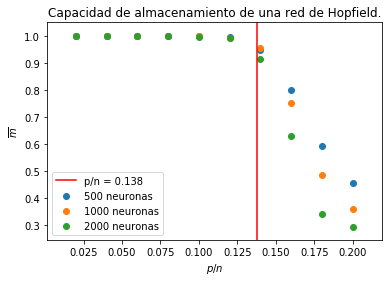

<Figure size 432x288 with 0 Axes>

In [5]:
%matplotlib inline

plt.figure()
for k in range(len(parameters_list)):
    label = '{} neuronas'.format(neurons_list[k])
    plt.scatter(alpha_vals, data[str(neurons_list[k])], label=label)
plt.title('Capacidad de almacenamiento de una red de Hopfield.')
plt.axvline(x=0.138, color='r', label='p/n = 0.138')
plt.xlabel(r'$p/n$')
plt.ylabel(r'$\overline{m}$')
plt.legend(loc='lower left')
plt.show()
plt.savefig('Figs/fig.pdf')